In [217]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import pytz

%matplotlib inline

In [2]:
def load_TS(filename):
    '''Load the timeseries file from path FILENAME into a dataframe TS_OUT
    '''
    
    # Load timeseries file and extract headers
    file_obj = open(filename, 'rt')
    for index, line in enumerate(file_obj):
        line = line.strip()
        if line.startswith('*FieldNames:'):
            field_names = line.split(': ', 1)[1].split(', ')
        elif line.startswith('*FieldUnits:'):
            field_units = line.split(': ', 1)[1].split(', ')
        elif line.startswith('*EndOfHeader'):
            break
    
    # Read timeseries data into dataframe and assign header
    data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index+1)
    
    # Extract startdate and convert to MPL time
    dt_stamp = field_units[0].split('hr since ', 1)[1].split(' LST', 1)[0]
    dt_num   = dts.date2num(dtm.datetime.strptime(dt_stamp, '%Y-%m-%d %H:%M:%S'))
    
    # Create date dataframe and append to DATA
    date   = pd.DataFrame({'date': data['time']/24 + dt_num})
    TS_out = pd.concat([date, data], axis=1)
    
    return TS_out

In [263]:
def load_hoff(filename):
    '''Load the hoffmueller file from path FILENAME into a panel HOFF_OUT
    '''
    
    # Load timeseries file and extract headers
    file_obj = open(filename, 'rt')
    for index, line in enumerate(file_obj):
        line = line.strip()
        if line.startswith('*FieldNames:'):
            field_names = line.split(': ', 1)[1].split(', ')
        elif line.startswith('*FieldUnits:'):
            field_units = line.split(': ', 1)[1].split(', ')
        elif line.startswith('*HoffmuellerStartYr:'):
            year_start = line.split(': ', 1)[1]
        elif line.startswith('*HoffmuellerStartDay:'):
            day_start = line.split(': ', 1)[1]
        elif line.startswith('*HoffmuellerStartSec:'):
            sec_start = line.split(': ', 1)[1]
        elif line.startswith('*HoffmuellerInterval:'):
            interval = line.split(': ', 1)[1]
        elif line.startswith('*EndOfHeader'):
            break
        
    # Read timeseries data into dataframe and assign header
    data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, index_col=0, chunksize=83)
    
    # Timestamp in matplotlib time
    dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
    
    # Extract dataframe chunks into dictionary
    data_dict = {}
    for index, chunk in enumerate(data):
        data_dict[dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC'))] = chunk.dropna(how='all')

    # Load dictionary into panel object
    hoff_out = pd.Panel(data_dict)
    
    return hoff_out

In [264]:
def loadSOG(filesystem, bloomyear, filestr):
    '''
    '''

    # Specify standard timeseries output paths
    filepath = '/ocean/bmoorema/research/SOG/{0}/{1}/{2}/{3}/{3}_{4}/'.format(
        filesystem['category'], filesystem['test'], filesystem['type'], bloomyear, filestr)
    
    physIN = filepath + 'timeseries/std_phys_SOG.out'
    bioIN  = filepath + 'timeseries/std_bio_SOG.out'
    chemIN = filepath + 'timeseries/std_chem_SOG.out'
    hoffIN = filepath + 'profiles/hoff-SOG.dat'
    
    phys_TS = load_TS(physIN)
    bio_TS  = load_TS(bioIN)
    chem_TS = load_TS(chemIN)
    hoff    = load_hoff(hoffIN)
    
    return phys_TS, bio_TS, chem_TS, hoff

In [265]:
filesystem = {'category': 'SOG-CO2', 'test': 'sensitivity', 'type': 'BBC'}
bloomyear = 2001
filestr = 'DIC2034'

phys_TS, bio_TS, chem_TS, hoff = loadSOG(filesystem, bloomyear, filestr)

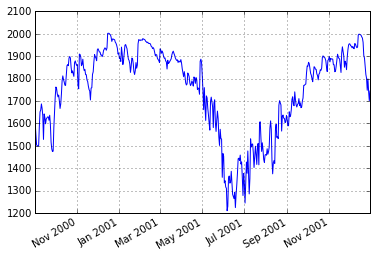

In [271]:
hoff.ix[:, 0.0, 'dissolved inorganic carbon'].plot()

In [2]:
enumerate(file_obj)

NameError: name 'file_obj' is not defined